# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
* [Stage 2. Data preprocessing](#data_preprocessing)
* [Stage 3. Prioritizing hypotheses](#hypotheses)
* [Stage 4. A/B Test Analysis](#analysis)
* [Conclusion](#end)

## Introduction <a id='intro'></a>
In this project, we will prioritizing several hypotheses aimed at increasing the revenue of a big online store and then conducting an A/B test to evaluate the effectiveness of these hypotheses. We will analyze real data from the store to draw conclusions and provide recommendations.

### Goal: 
The project consists of two main goals:
1. Prioritizing hypotheses.
2. Analyzing the A/B test and providing reccomendations.

### Stages
The data used in this project includes:
- **Hypotheses**: Descriptions and metrics for prioritizing hypotheses.
- **Orders**: Details of orders placed during the A/B test.
- **Visits**: Daily visit data for each test group.

Our project will consist of the following stages:
1. Data Overview and Preprocessing.
2. Prioritizing Hypotheses.
3. A/B Test Analysis.

## Stage 1. Data overview <a id='data_review'></a>

In [1]:
#importing pandas library
#importing mattplot library
#importing numpy library
#importing scipy stats library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#reading the files and storing it in df
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
#obtaining the first rows from the table
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#obtaining general information about the data
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#obtaining the first 10 rows from the table
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [6]:
#obtaining general information about the data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


We will change the data type of the 'date' column in the Data preprocessing stage.

In [7]:
#obtaining the first 10 rows from the table
visits.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
#obtaining general information about the data
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


We will change the data type of the 'date' column in the Data preprocessing stage.

#### Conclusion

During the Data Exploration stage, we opened the data files, examined the contents of each table, and noted any nonstandard formatting. We also set appropriate arguments in pd.read_csv() to read the data correctly, ensuring we could proceed with further analysis.

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>

In [9]:
#changing data types from object to datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [10]:
#checking for duplicate rows in the DataFrame orders_clean
orders.duplicated().sum()

0

In [11]:
#checking for duplicate rows in the DataFrame visits
visits.duplicated().sum()

0

In [12]:
#finding visitors in both groups
orders_grouped = orders.groupby('visitorId')['group'].nunique().reset_index()
orders_grouped

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [13]:
#creating a list with visitors that are in both groups
visitors_duplicate = orders_grouped[orders_grouped['group'] > 1]['visitorId']
visitors_duplicate

2          8300375
44       199603092
51       232979603
55       237748145
66       276558944
84       351125977
97       393266494
114      457167155
119      471551937
122      477780734
192      818047933
236      963407295
299     1230306981
311     1294878855
316     1316129916
318     1333886533
340     1404934699
386     1602967004
393     1614305549
402     1648269707
406     1668030113
422     1738359350
436     1801183820
469     1959144690
487     2038680547
491     2044997962
569     2378935119
591     2458001652
614     2579882178
619     2587333274
622     2600415354
639     2654030115
648     2686716486
661     2712142231
662     2716752286
677     2780786433
710     2927087541
715     2949041841
718     2954449915
744     3062433592
784     3202540741
792     3234906277
884     3656415546
897     3717692402
909     3766097110
917     3803269165
932     3891541246
950     3941795274
954     3951559397
957     3957174400
958     3963646447
960     3972127743
963     3984

In [14]:
print(f"Number of duplicate visitors: {visitors_duplicate.count()}")

Number of duplicate visitors: 58


In [15]:
#dropping out the visitors who were in 2 groups
orders_clean = orders[~orders['visitorId'].isin(visitors_duplicate)]
orders_clean = orders_clean.reset_index(drop=True)
orders_clean

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,255.7,B
1012,2662137336,3733762160,2019-08-14,100.8,B
1013,2203539145,370388673,2019-08-14,50.1,A
1014,1807773912,573423106,2019-08-14,165.3,A


#### Conclusion

In the Data Preprocessing stage, we verified and fixed the data types and also removed the duplicates: visitors who have gotten into both group A and group B. There were no missing values. As a result, we proceeded with confidence to the analysis phase, knowing that our dataset is well-prepared and ready for analysis.

## Stage 3. Prioritizing Hypotheses <a id='hypotheses'></a>

In [16]:
#setting the option to display the full content of each column
pd.set_option('display.max_colwidth', None)
#obtaining the first rows from the hypotheses df
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [17]:
#calculating ICE and RICE metrics for the df
hypotheses['ICE'] = hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']
hypotheses['RICE'] = hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [18]:
#displaying the ICE sorted data
hypotheses[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [19]:
#displaying the RICE sorted data
hypotheses[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


In [20]:
#creating a new df to compare ICE and RICE metrics
hypotheses_comparison = hypotheses[['Hypothesis','ICE','RICE']].copy()
#rank the hypotheses based on ICE and RICE
hypotheses_comparison['ICE_rank']= hypotheses_comparison['ICE'].rank(ascending=False).astype(int)
hypotheses_comparison['RICE_rank']= hypotheses_comparison['RICE'].rank(ascending=False).astype(int)
#sorting the dataframe by ICE rank
hypotheses_comparison=hypotheses_comparison.sort_values(by='ICE_rank')
hypotheses_comparison

,Hypothesis,ICE,RICE,ICE_rank,RICE_rank
8,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2,1,5
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0,2,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0,3,1
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0,4,3
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0,5,2
1,Launch your own delivery service. This will shorten delivery time,2.000000,4.0,6,7
5,Add a customer review page. This will increase the number of orders,1.333333,4.0,7,7
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0,8,6
4,Change the background color on the main page. This will increase user engagement,1.000000,3.0,9,9


The ninth hypothesis initially appears to be the most promising based on its ICE score. However, after calculating the RICE score, its ranking drops to fifth place. This decrease is primarily due to its low 'Reach' parameter, which is rated at 1/10, indicating it won't impact a significant number of users. Conversely, the fifth hypothesis consistently ranks last in both ICE and RICE scores, indicating it's not worth pursuing further.

## Stage 4. A/B Test Analysis <a id='analysis'></a>

#### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

In [21]:
# Will need the orders_clean df for this task
orders_clean

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,255.7,B
1012,2662137336,3733762160,2019-08-14,100.8,B
1013,2203539145,370388673,2019-08-14,50.1,A
1014,1807773912,573423106,2019-08-14,165.3,A


In [22]:
#calculating cumulative revenue for each group
cum_revenue = orders_clean.groupby(['date', 'group']).agg({'revenue': 'sum'}).groupby(level=1).cumsum().reset_index()
cum_revenue

,date,group,revenue
0,2019-08-01,A,2266.6
1,2019-08-01,B,967.2
2,2019-08-02,A,3734.9
3,2019-08-02,B,3535.3
4,2019-08-03,A,5550.1
...,...,...,...
57,2019-08-29,B,74576.7
58,2019-08-30,A,52363.7
59,2019-08-30,B,77863.5
60,2019-08-31,A,53212.0


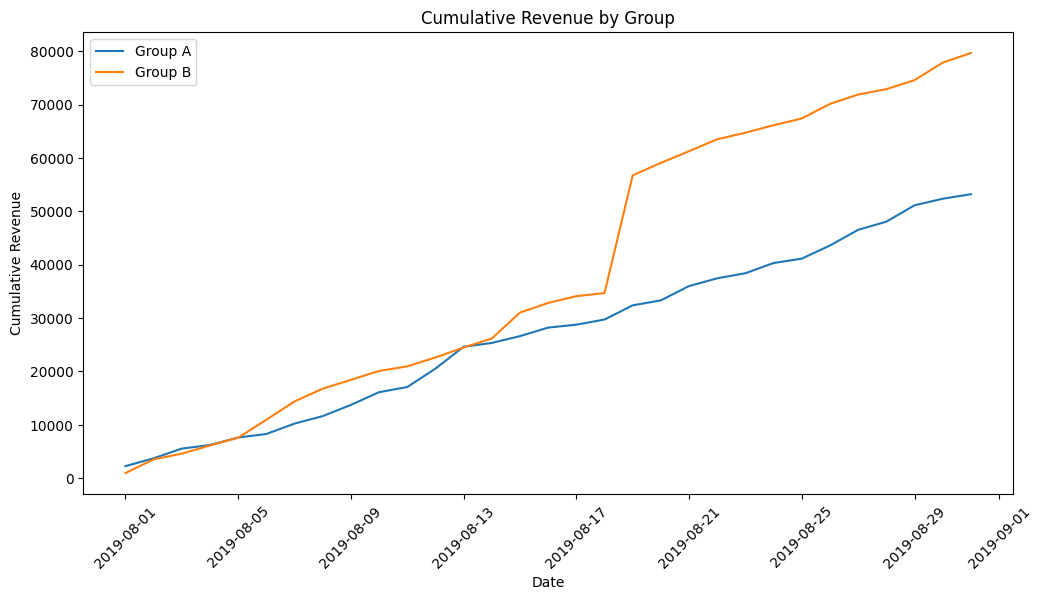

In [23]:
#plotting cumulative revenue by group
plt.figure(figsize=(12, 6))
for group in cum_revenue['group'].unique():
    plt.plot(cum_revenue[cum_revenue['group'] == group]['date'], 
             cum_revenue[cum_revenue['group'] == group]['revenue'], label=f'Group {group}')
    
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.xticks(rotation=45)  
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.show()

From August 1 to 17, 2019, the cumulative revenue for both Group A and Group B was rising steadily. However, after August 17, there is a sudden surge in Group B's cumulative revenue, indicating a significant boost due to an event or intervention. Further investigation is required to identify the cause of this surge and the specific changes made for Group B that led to this improvement.

#### Graph cumulative average order size by group. Make conclusions and conjectures.

In [24]:
#calculating cumulative revenue and number of orders for each group
cumulative_avg_order = orders_clean.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'count'}).rename(columns={'transactionId': 'orders'}).groupby(level=1).cumsum().reset_index()
cumulative_avg_order.head(10)

,date,group,revenue,orders
0,2019-08-01,A,2266.6,23
1,2019-08-01,B,967.2,17
2,2019-08-02,A,3734.9,42
3,2019-08-02,B,3535.3,40
4,2019-08-03,A,5550.1,66
5,2019-08-03,B,4606.9,54
6,2019-08-04,A,6225.6,77
7,2019-08-04,B,6138.5,68
8,2019-08-05,A,7623.6,99
9,2019-08-05,B,7587.8,89


In [25]:
#calculating cumulative average order size
cumulative_avg_order['cumulative_avg_order_size'] = cumulative_avg_order['revenue'] / cumulative_avg_order['orders']
cumulative_avg_order.head()

,date,group,revenue,orders,cumulative_avg_order_size
0,2019-08-01,A,2266.6,23,98.547826
1,2019-08-01,B,967.2,17,56.894118
2,2019-08-02,A,3734.9,42,88.926190
3,2019-08-02,B,3535.3,40,88.382500
4,2019-08-03,A,5550.1,66,84.092424


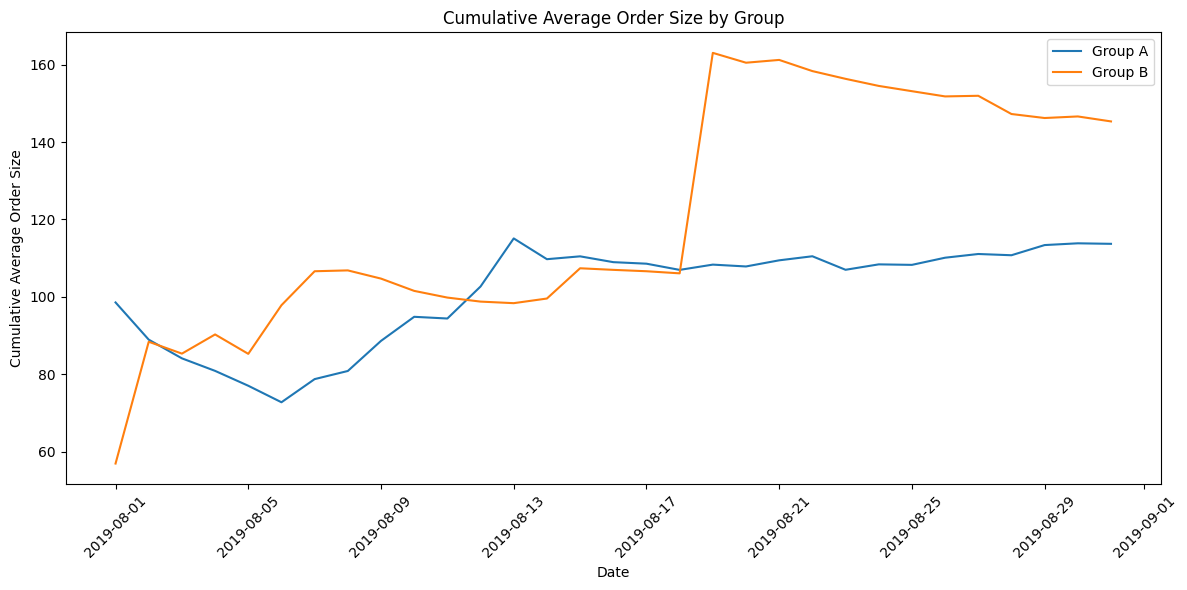

In [26]:
#plotting cumulative average order size by group
plt.figure(figsize=(12, 6))
for group in cumulative_avg_order['group'].unique():
    plt.plot(cumulative_avg_order[cumulative_avg_order['group'] == group]['date'], 
             cumulative_avg_order[cumulative_avg_order['group'] == group]['cumulative_avg_order_size'], label=f'Group {group}')

plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average purchase size becomes steady by the end of the test: it stabilizes for group A and keeps on falling for group B. The surge in group B after the 17th of August may have been due to the presence of large, expensive orders. Further investigation is required to identify the cause of this surge and the specific changes made for Group B that led to this improvement.

#### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [27]:
#separating the cumulative data into two DataFrames for easier comparison
cumulative_avg_order_A = cumulative_avg_order[cumulative_avg_order['group'] == 'A'][['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'cumulative_avg_order_size_A'})
cumulative_avg_order_B = cumulative_avg_order[cumulative_avg_order['group'] == 'B'][['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'cumulative_avg_order_size_B'})

#merging the two DataFrames on the date column
merged_data = pd.merge(cumulative_avg_order_A, cumulative_avg_order_B, on='date')

#calculating the relative difference
merged_data['relative_difference'] = (merged_data['cumulative_avg_order_size_B'] / merged_data['cumulative_avg_order_size_A']) - 1
merged_data.head()

,date,cumulative_avg_order_size_A,cumulative_avg_order_size_B,relative_difference
0,2019-08-01,98.547826,56.894118,-0.422675
1,2019-08-02,88.926190,88.382500,-0.006114
2,2019-08-03,84.092424,85.312963,0.014514
3,2019-08-04,80.851948,90.272059,0.116511
4,2019-08-05,77.006061,85.256180,0.107136


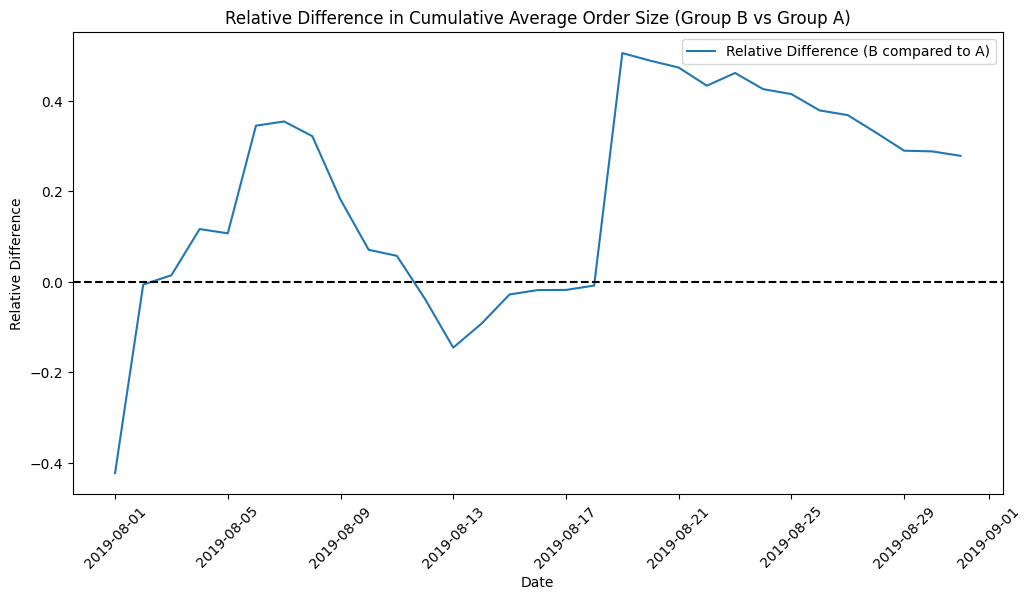

In [28]:
#plotting the relative difference
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_difference'], label='Relative Difference (B compared to A)')

plt.title('Relative Difference in Cumulative Average Order Size (Group B vs Group A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.xticks(rotation=45)
plt.legend()

#adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

The relative difference in cumulative average order size between Group B and Group A fluctuates over time. After August 17, there is a notable increase in the relative difference, suggesting that Group B experienced a surge in larger orders. However, this difference decreases towards the end of the test, indicating that the average order size in Group B fell relative to Group A. The initial surge may have been driven by a few large orders, and further data is required to establish a consistent trend.

#### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [29]:
#calculating number of orders per day for each group
daily_orders = orders_clean.groupby(['date', 'group']).agg({'transactionId': 'count'}).rename(columns={'transactionId': 'orders'}).reset_index()
daily_orders

,date,group,orders
0,2019-08-01,A,23
1,2019-08-01,B,17
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,15
58,2019-08-30,A,9
59,2019-08-30,B,21
60,2019-08-31,A,8


In [30]:
#merging the daily orders data with the visits data
daily_data = pd.merge(daily_orders, visits, on=['date', 'group'])
#calculating the daily conversion rate
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']
daily_data

,date,group,orders,visits,conversion_rate
0,2019-08-01,A,23,719,0.031989
1,2019-08-01,B,17,713,0.023843
2,2019-08-02,A,19,619,0.030695
3,2019-08-02,B,23,581,0.039587
4,2019-08-03,A,24,507,0.047337
...,...,...,...,...,...
57,2019-08-29,B,15,531,0.028249
58,2019-08-30,A,9,490,0.018367
59,2019-08-30,B,21,490,0.042857
60,2019-08-31,A,8,699,0.011445


In [31]:
#determining the minimum and maximum dates
min_date = daily_data['date'].min()
max_date = daily_data['date'].max()

#determining the minimum and maximum conversion rates
min_conversion_rate = daily_data['conversion_rate'].min()
max_conversion_rate = daily_data['conversion_rate'].max()

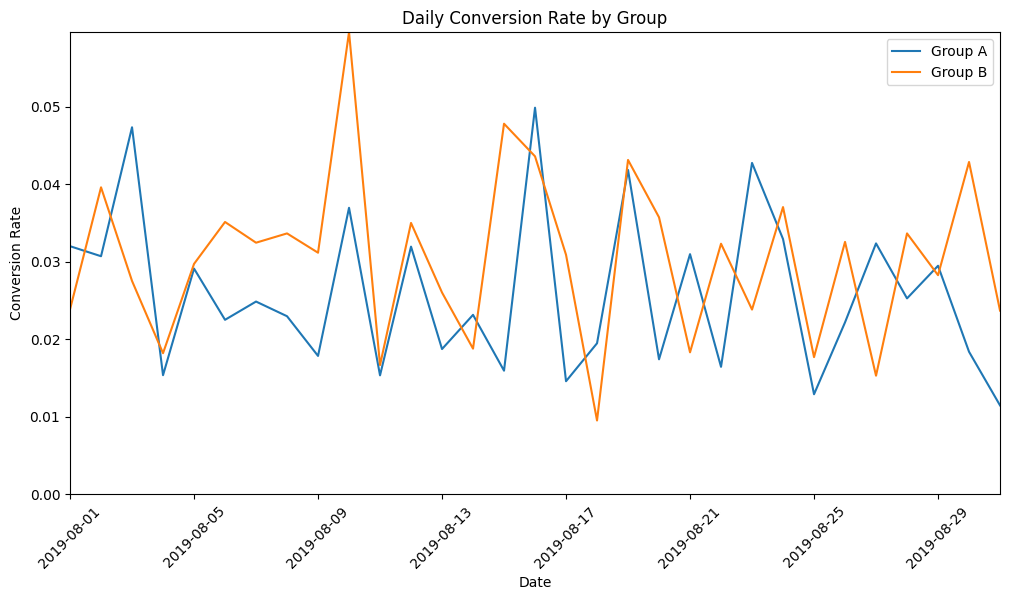

In [32]:
# Plot the daily conversion rates by group
plt.figure(figsize=(12, 6))
for group in daily_data['group'].unique():
    plt.plot(daily_data[daily_data['group'] == group]['date'], 
             daily_data[daily_data['group'] == group]['conversion_rate'], label=f'Group {group}')

plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.axis([min_date, max_date, 0, max_conversion_rate])
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.legend()

plt.show()

The conversion rates for both groups show significant fluctuations throughout the testing period. Group A's conversion rate varies between 1% and 5%, whereas Group B's conversion rate ranges from 1% to 6%. These changes indicate considerable variability in how effectively each group converted visits into orders. Further analysis is required to determine the factors driving these fluctuations and to understand their impact on overall performance.

In [33]:
# calculating the cumulative orders and visits for each group
daily_data['cumulative_orders'] = daily_data.groupby('group')['orders'].cumsum()
daily_data['cumulative_visits'] = daily_data.groupby('group')['visits'].cumsum()

#calculating the cumulative conversion rate
daily_data['cumulative_conversion_rate'] = daily_data['cumulative_orders'] / daily_data['cumulative_visits']
daily_data

,date,group,orders,visits,conversion_rate,cumulative_orders,cumulative_visits,cumulative_conversion_rate
0,2019-08-01,A,23,719,0.031989,23,719,0.031989
1,2019-08-01,B,17,713,0.023843,17,713,0.023843
2,2019-08-02,A,19,619,0.030695,42,1338,0.031390
3,2019-08-02,B,23,581,0.039587,40,1294,0.030912
4,2019-08-03,A,24,507,0.047337,66,1845,0.035772
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,531,0.028249,510,17708,0.028801
58,2019-08-30,A,9,490,0.018367,460,18037,0.025503
59,2019-08-30,B,21,490,0.042857,531,18198,0.029179
60,2019-08-31,A,8,699,0.011445,468,18736,0.024979


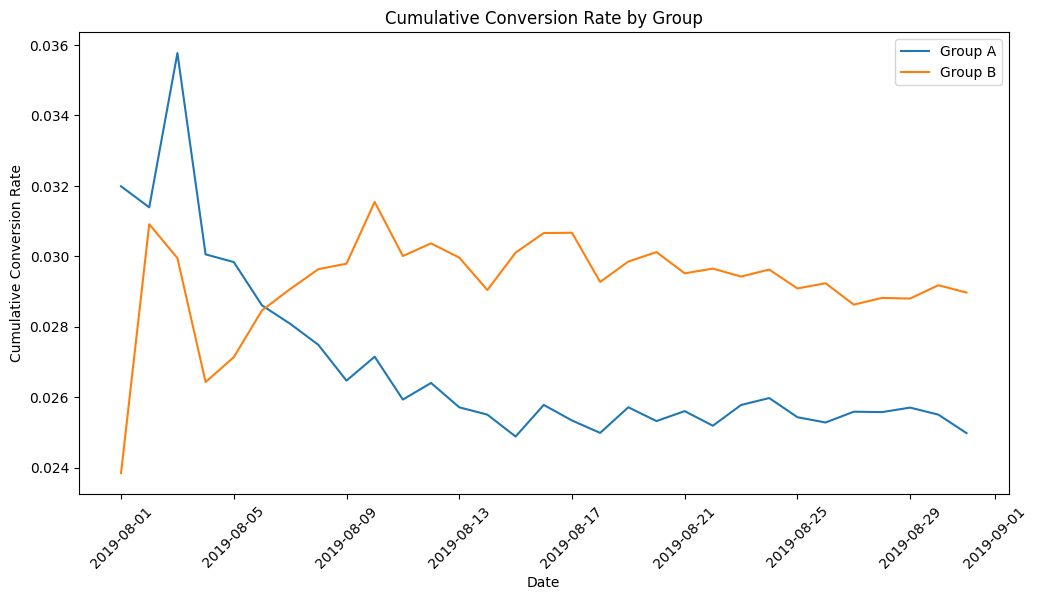

In [34]:
#plotting the cumulative conversion rate by group
plt.figure(figsize=(12, 6))
for group in daily_data['group'].unique():
    plt.plot(daily_data[daily_data['group'] == group]['date'], 
             daily_data[daily_data['group'] == group]['cumulative_conversion_rate'], label=f'Group {group}')

plt.title('Cumulative Conversion Rate by Group')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Conversion Rate')
plt.legend()
plt.show()

The second plot clearly shows that the cumulative conversion rate for Group B is consistently higher than for Group A, indicating greater success in converting visits to orders over the observed period. Both groups' rates stabilize after August 9th, suggesting the interventions or changes had settled by this date.

#### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [35]:
#aggregating the number of orders per user
orders_per_user = orders_clean.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'orders']

In [36]:
#sorting the DataFrame by the number of orders in descending order to see the general picture
orders_per_user.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


As we can see, there are only 7 visitors in the entire dataset who have made 3 orders. This behavior is significantly different from the majority of users, who typically place only one or two orders. Therefore, we can consider these users as outliers.

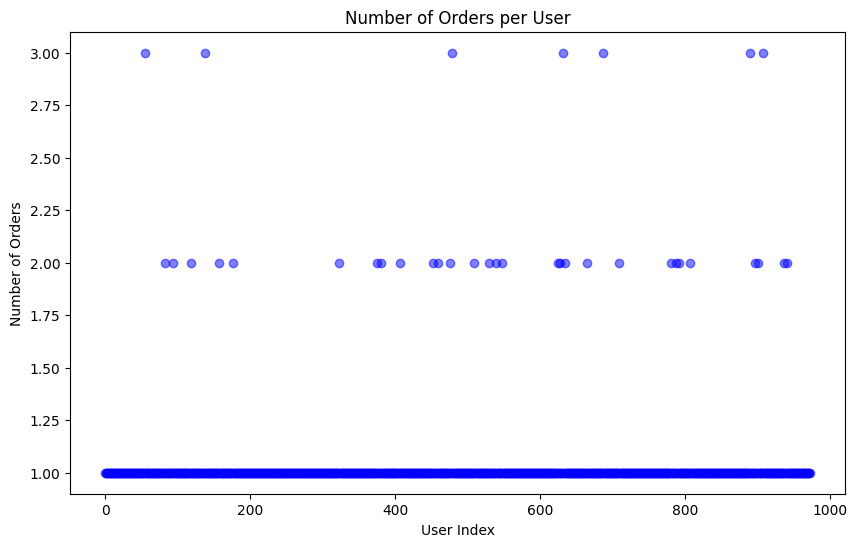

In [37]:
x_values = pd.Series(range(0,len(orders_per_user)))

# plotting the scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_per_user['orders'], alpha=0.5, color='b')
plt.title('Number of Orders per User')
plt.xlabel('User Index')
plt.ylabel('Number of Orders')
plt.show()

As we can see that the majority of customers placed only 1 order. Also, this scatterplot confirms our previous conclusion that there are no significant outliers, indicating a stable distribution without extreme values. The few users who placed 3 orders can be considered anomalies, as they deviate from the typical ordering behavior.

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [38]:
#calculating the 95th and 99th percentiles for the number of orders per user
percentile_95th = np.percentile(orders_per_user['orders'], 95)
percentile_99th = np.percentile(orders_per_user['orders'], 99)

#displaying the results
print(f"95th percentile for the number of orders per user: {percentile_95th}")
print(f"99th percentile for the number of orders per user: {percentile_99th}")

#defining the point at which a data point becomes an anomaly
anomaly = percentile_99th
print(f"Any data point with orders per user greater than {anomaly} is considered an anomaly.")

95th percentile for the number of orders per user: 1.0
99th percentile for the number of orders per user: 2.0
Any data point with orders per user greater than 2.0 is considered an anomaly.


 Most users (up to 95%) place 1 or fewer orders. This indicates that single-order users dominate the dataset. Nearly all users (up to 99%) place 2 or fewer orders. Users placing more than 2 orders are quite rare and can be considered significant outliers. These users might represent highly engaged or potentially problematic accounts.

#### Plot a scatter chart of order prices. Make conclusions and conjectures.

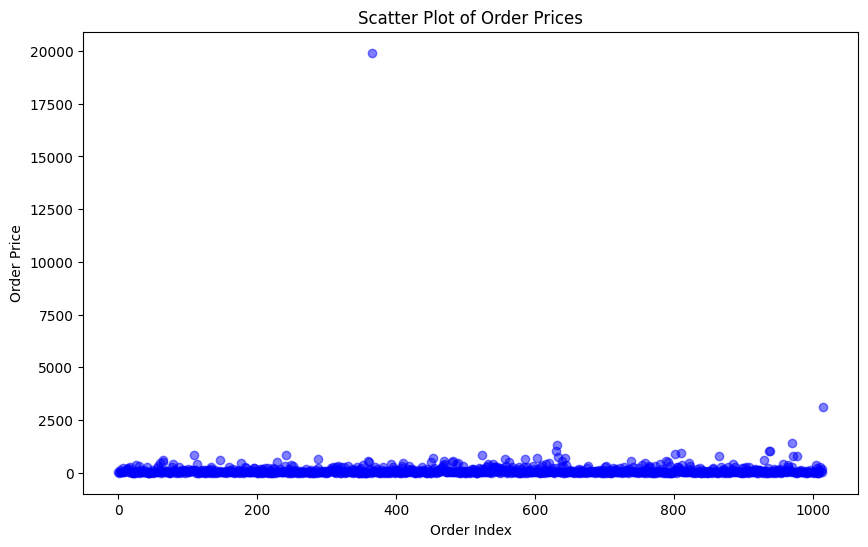

In [39]:
# Generate the x_values
x_values = pd.Series(range(len(orders_clean['revenue'])))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_clean['revenue'], alpha=0.5, color='b')
plt.title('Scatter Plot of Order Prices')
plt.xlabel('Order Index')
plt.ylabel('Order Price')

plt.show()

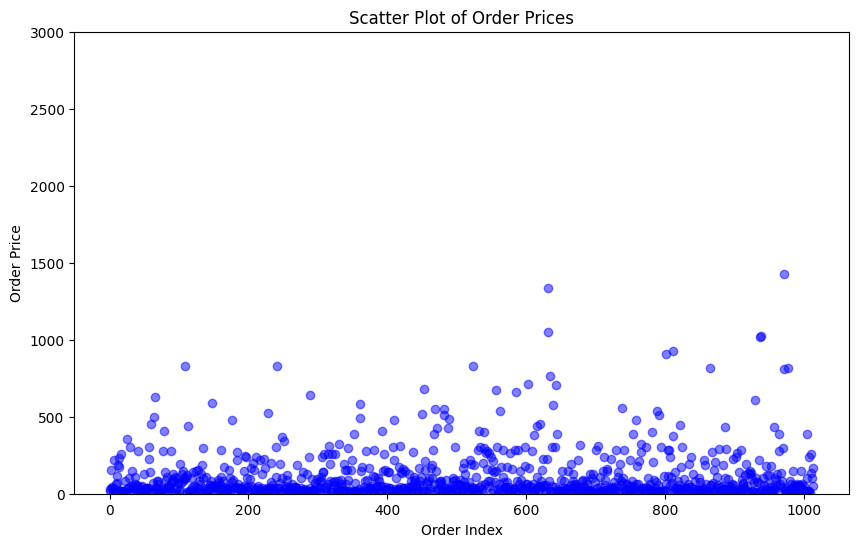

In [40]:
#creating a scatter plot to closely examine the rest of the dataframe after excluding the obvious outlier.

plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_clean['revenue'], alpha=0.5, color='b')
plt.title('Scatter Plot of Order Prices')
plt.xlabel('Order Index')
plt.ylabel('Order Price')
plt.ylim(0, 3000)  

plt.show()

As we can see, the majority of orders fall within the range of 0 to 500. There are only 2 orders exceeding 2500, which can be considered anomalies due to their deviation from the typical ordering behavior. Now we can also understand what order caused the surge in group B in the previous analyzed metrics. 

In [41]:
#defining the order that caused the surge
high_revenue_orders = orders_clean[orders_clean['revenue'] > 15000]
high_revenue_orders

,transactionId,visitorId,date,revenue,group
365,590470918,1920142716,2019-08-19,19920.4,B


This confirms our previous assessments.

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [42]:
#calculating the 95th and 99th percentiles for the order prices
percentile_95th = np.percentile(orders_clean['revenue'], 95)
percentile_99th = np.percentile(orders_clean['revenue'], 99)

#displaying the results
print(f"95th percentile for the number of orders per user: {percentile_95th}")
print(f"99th percentile for the number of orders per user: {percentile_99th}")

#defining the point at which a data point becomes an anomaly
anomaly = percentile_99th
print(f"Any data point with orders per user greater than {anomaly} is considered an anomaly.")

95th percentile for the number of orders per user: 414.275
99th percentile for the number of orders per user: 830.3
Any data point with orders per user greater than 830.3 is considered an anomaly.


Based on the analysis, we determined that the 95th percentile for the number of orders per user is 414.275, while the 99th percentile is 830.3. This implies that 95% of users placed 414 orders or fewer, and 99% placed 830 orders or fewer.

With an anomaly threshold set at the 99th percentile (830.3 orders per user), any user exceeding this threshold is considered an anomaly. This threshold helps identify users who deviate significantly from the typical ordering behavior observed in the dataset.

#### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

We'll create the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders']. For users with at least one order, we'll indicate the number of orders made. 

In [43]:
#obtaing the the first rows from the df
orders_clean.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B


In [44]:
#obtaing the the first rows from the df
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [45]:
#creating the variable ordersByUsersA to store unique number of orders for each user
ordersByUsersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [46]:
##creating the variable ordersByUsersB to store unique number of orders for each user
ordersByUsersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test. 

In [47]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

We will use the Mann-Whitney test,it assesses whether there is a significant difference between the distributions of two independent samples. The p-value tells us if the difference in the distributions is statistically significant(p-value typically 0.05).

Second line prints the relative difference in the mean order rates between sampleB and sampleA.

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160



- The p-value from the Mann-Whitney U test (0.011) indicates a statistically significant difference in the order behavior between the two groups.

- The relative difference (0.160) suggests that group B's conversion rate is 16% higher than group A's.

- These results imply that the changes or interventions applied to group B led to a significant and meaningful increase in the number of orders per visit compared to group A.


#### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

To calculate the statistical significance of the difference in the segments' average order size, we'll pass the data on revenue to the mannwhitneyu() criterion. 

In [49]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1))

0.862
0.278


- This p-value suggests that there is no statistically significant difference in revenue distributions between groups A and B. With a value greater than 0.05, we fail to reject the null hypothesis.

- The relative difference (0.278) suggests that group B's average order size is 27.8% higher than group A's.

- In summary, while there is a noticeable difference in mean revenue between the two groups, the statistical test does not provide enough evidence to conclude that this difference is significant.

#### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Let's define anomalous users as those who place more than 2 orders or have at least one order greater than 830.3 dollars . We'll remove the top 1 percent of users with the highest number of orders and the top 1 percent of users with the most expensive orders. We'll create data slices for users who placed more than 2 orders (users_with_many_orders) and users who places orders exceeding 830.3 dollars (users_with_expensive_orders). These slices will be combined into a table called 'abnormal_users'.

In [50]:
users_with_many_orders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
users_with_expensive_orders = orders_clean[orders_clean['revenue'] > 20000]['visitorId']
abnormalUsers = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10))
print(abnormalUsers.shape)

33      249864742
58      611059232
211    2108163459
347    2742574263
310    2988190573
409    3908431265
416    3967698036
Name: visitorId, dtype: int64
(7,)


We have 7 anamalous visitors in total.

In [51]:
#preparing samples of the number of orders per user for each test group:

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [52]:
#applying the statistical Mann-Whitney criterion to the resulting samples

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.008
0.185


The anomalies or outliers identified and removed during the filtering process didn't significantly influence the overall pattern of conversion rates between the groups. The difference in conversion rates between the groups is statistically significant both with the raw data and the filtered data, with slightly stronger significance observed in the filtered data. 

#### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [53]:
#applying the statistical Mann-Whitney criterion to the filtered data to calculate the significant difference in order size between the groups
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_clean[np.logical_and(
        orders_clean['group']=='A',
        np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_clean[np.logical_and(
        orders_clean['group']=='B',
        np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_clean[np.logical_and(orders_clean['group']=='B',np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_clean[np.logical_and(
        orders_clean['group']=='A',
        np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.749
0.279


- The p-value is 0.749, indicating that there is still no statistically significant difference in average order size between group A and group B after filtering anomalies.
- The relative difference remains at 27.9%.
- These results suggest that even after removing anomalies, there is no significant difference in average order size between the two groups.

#### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.


**Order size analysis:**

- There is no statistically significant difference in order size between Group A and Group B.
- Even after filtering anomalies, the difference in average order size between the two groups remains insignificant.
- This suggests that any observed differences in revenue between the groups are likely due to random variation rather than the impact of the experimental changes.

**Conversion Analysis:**

- Group B's conversion rate is significantly higher than Group A's, even after filtering anomalies.
- This shows that the changes made to Group B have effectively increased the number of orders per visit compared to Group A.

**Decision:**

- Based on the findings, it is recommended to stop the test and conclude that there is no significant difference between the groups in terms of average order size. However, the test should continue to monitor and analyze the conversion rate, as there is a significant difference between the groups in this aspect.


## Conclusion <a id='end'></a>

Based on our analysis, here are our conclusions:

**Hypotheses Prioritization:**

- The ninth hypothesis initially appears to be the most promising based on its ICE score. However, after calculating the RICE score, its ranking drops to fifth place. This decrease is primarily due to its low 'Reach' parameter, which is rated at 1/10, indicating it won't impact a significant number of users.
- Conversely, the fifth hypothesis consistently ranks last in both ICE and RICE scores, indicating it's not worth pursuing further.



**A/B Test Results:**

Order size analysis:

- There is no statistically significant difference in order size between Group A and Group B.
- Even after filtering anomalies, the difference in average order size between the two groups remains insignificant.
- This suggests that any observed differences in revenue between the groups are likely due to random variation rather than the impact of the experimental changes.

Conversion Analysis:

- Group B's conversion rate is significantly higher than Group A's, even after filtering anomalies.
- This shows that the changes made to Group B have effectively increased the number of orders per visit compared to Group A.

**Decision:**

Based on the findings, it is recommended to stop the test and conclude that there is no significant difference between the groups in terms of average order size. However, the test should continue to monitor and analyze the conversion rate, as there is a significant difference between the groups in this aspect.
